# Explore here

In [34]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
datos = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
datos.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
datos.shape

(48895, 16)

In [36]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

observamos que que data tiene 48895 filas y 16 columnas, observamos que tanto la columna last_review como reviews_per_month tienen mas de 1000 valores nulos

In [37]:
datos.duplicated().sum()

np.int64(0)

In [38]:
data_limpio = datos.drop(["id","name", "host_name", "last_review", "reviews_per_month","calculated_host_listings_count" ], axis = 1, inplace = False)
data_limpio.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0


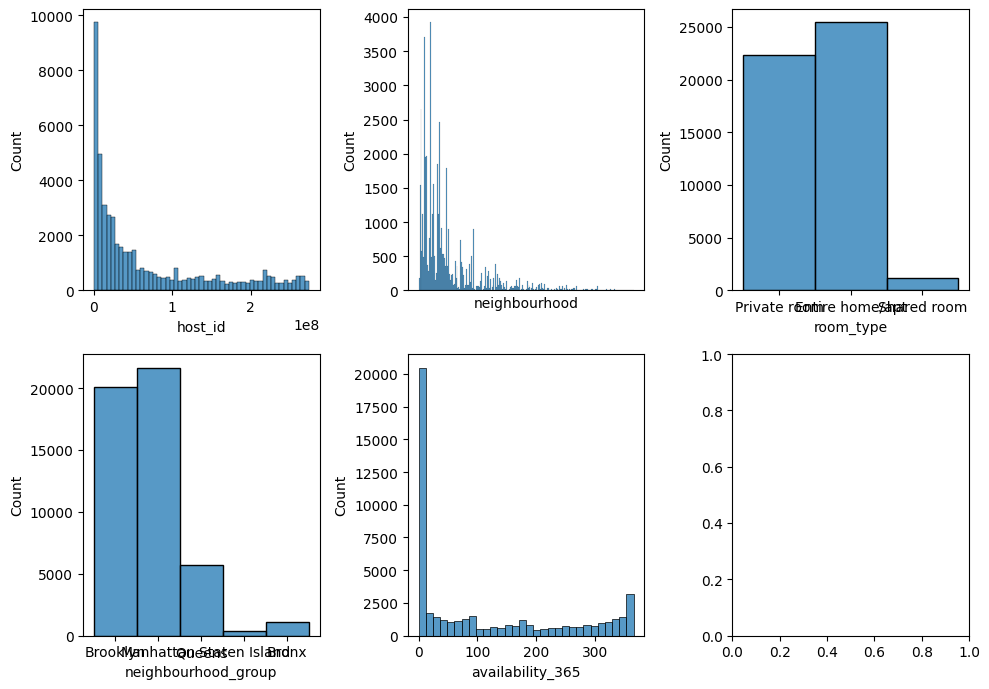

In [39]:

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0,0], data = data_limpio, x = "host_id")
sns.histplot(ax = axis[0,1], data = data_limpio, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[0,2], data = data_limpio, x = "room_type").set
sns.histplot(ax = axis[1,0], data = data_limpio, x = "neighbourhood_group").set
sns.histplot(ax = axis[1,1], data = data_limpio, x = "availability_365").set

plt.tight_layout()
plt.show()




In [40]:
# ## automatización
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math
# columns = ["host_id", "neighbourhood_group", "neighbourhood", "room_type", "availability_365"]

# # Calcular filas y columnas para organizar los gráficos en 3 por fila
# num_cols = 0
# for i in columns:
#     num_cols += 1
# num_rows = math.ceil(len(columns) / num_cols)
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3 * num_rows))

# # Asegurar que axes es siempre una lista bidimensional
# axes = axes.reshape(num_rows, num_cols) if num_rows > 1 else [axes]

# # Generar los gráficos
# col_index = 0
# for row in range(num_rows):
#     for col in range(num_cols):
#         if col_index < len(columns):
#             sns.histplot(data=data_limpio, x=columns[col_index], ax=axes[row][col])
#             axes[row][col].set_xticks([])
#             col_index += 1
#         else:
#             fig.delaxes(axes[row][col])  # Elimina gráficos vacíos
# plt.tight_layout()
# plt.show()

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

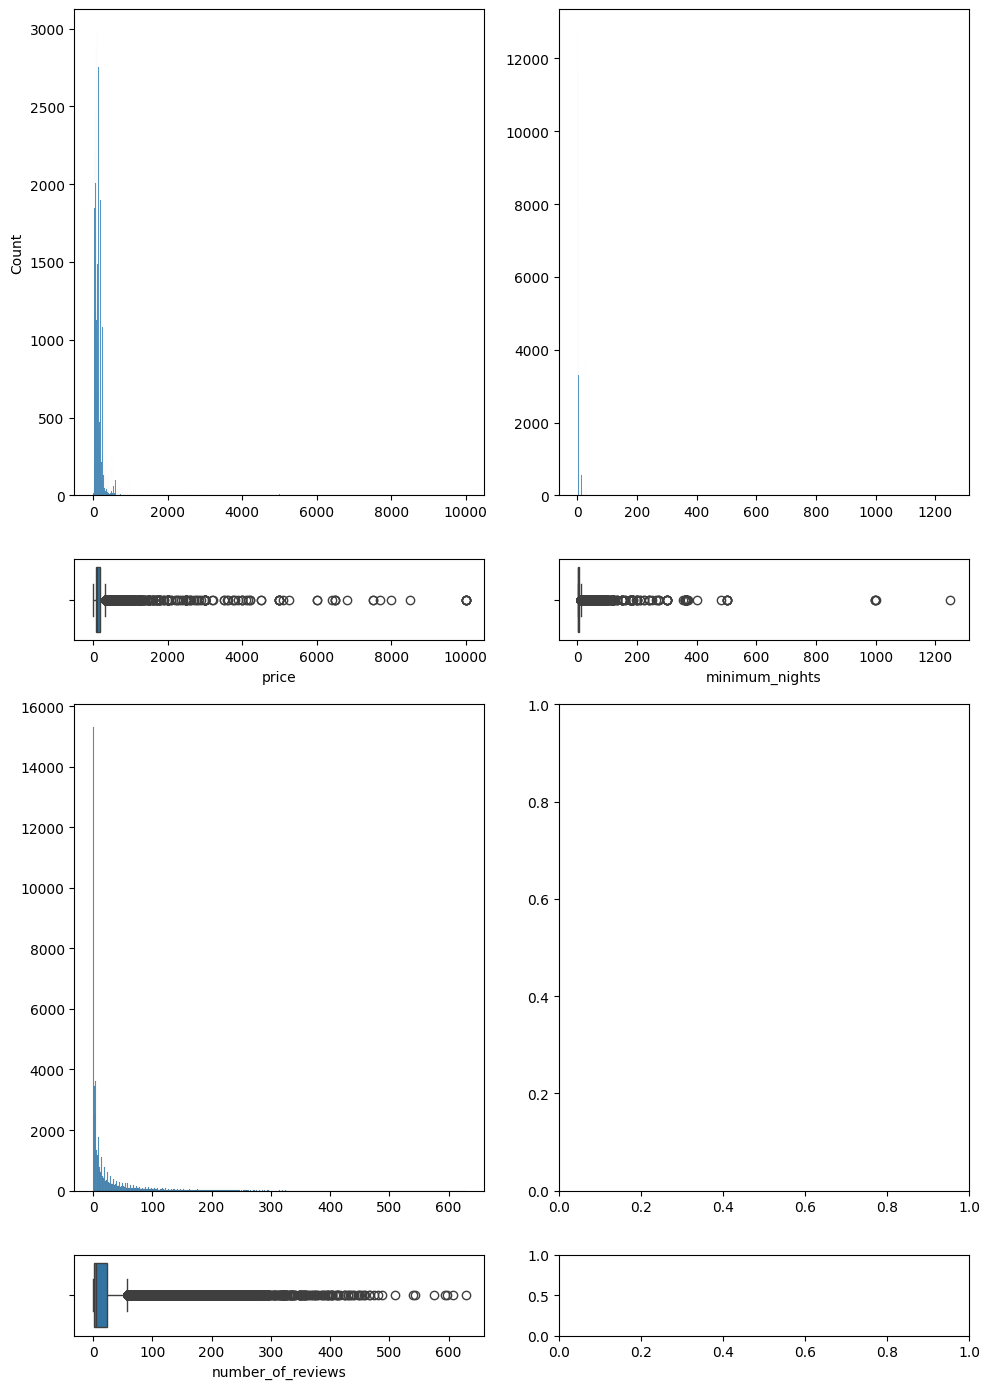

In [41]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data_limpio, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data_limpio, x = "price")
sns.histplot(ax = axis[0, 1], data = data_limpio, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data_limpio, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = data_limpio, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = data_limpio, x = "number_of_reviews")


plt.tight_layout()
plt.show()

In [42]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Lista de columnas a graficar
# columns = ["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]
# # Configurar la figura y los ejes con filas dinámicas
# fig, axis = plt.subplots(len(columns), 2, figsize=(10, len(columns) * 3.5), gridspec_kw={"height_ratios": [6] * len(columns)})
# # Recorrer las columnas y asignarlas a los ejes
# for i, col in enumerate(columns):
#     sns.histplot(ax=axis[i, 0], data=total_data, x=col)
#     sns.boxplot(ax=axis[i, 1], data=total_data, x=col)
#     # Ajustar los límites del eje X para evitar valores extremos
#     if col == "price":
#         axis[i, 0].set_xlim(0, 1500)
#         axis[i, 1].set_xlim(0, 1500)
#     elif col == "minimum_nights":
#         axis[i, 0].set_xlim(0, 40)
#         axis[i, 1].set_xlim(0, 100)
#     elif col == "number_of_reviews":
#         axis[i, 0].set_xlim(0, 200)
#         axis[i, 1].set_xlim(0, 400)
#     elif col == "calculated_host_listings_count":
#         axis[i, 0].set_xlim(0, 365)
#         axis[i, 1].set_xlim(0, 365)
# # Ajustar el diseño
# plt.tight_layout()
# # Mostrar los gráficos
# plt.show()

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

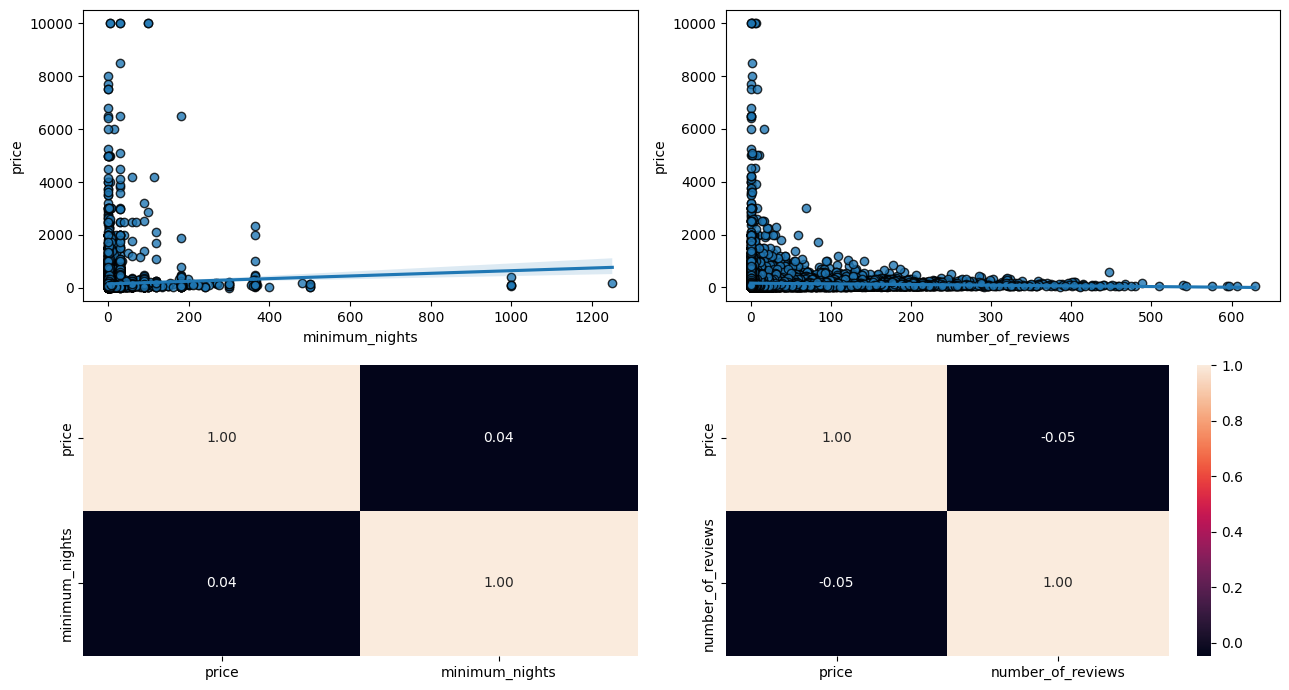

In [43]:
#Analisis numerico-numerico
fig, axis = plt.subplots(2, 2, figsize = (13, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_limpio, x = "minimum_nights", y = "price",scatter_kws = {'edgecolor': 'k'})
sns.heatmap(data_limpio[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_limpio, x = "number_of_reviews", y = "price",scatter_kws = {'edgecolor': 'k'})
sns.heatmap(data_limpio[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [44]:
# Crear la variable objetivo
# target = total_data["price"]
# num_variables = ["minimum_nights", "number_of_reviews", "calculated_host_listings_count"]
# # Crear la figura y los ejes
# num_rows = len(num_variables)
# fig, axis = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))
# # Crear gráficos para cada variable
# for i, var in enumerate(num_variables):
#     sns.regplot(ax=axis[i, 0], data=total_data, x=var, y=target, scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
#     sns.heatmap(total_data[[target.name, var]].corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=False)
# # Ajustar el layout
# plt.tight_layout()
# # Mostrar el plot
# plt.show()

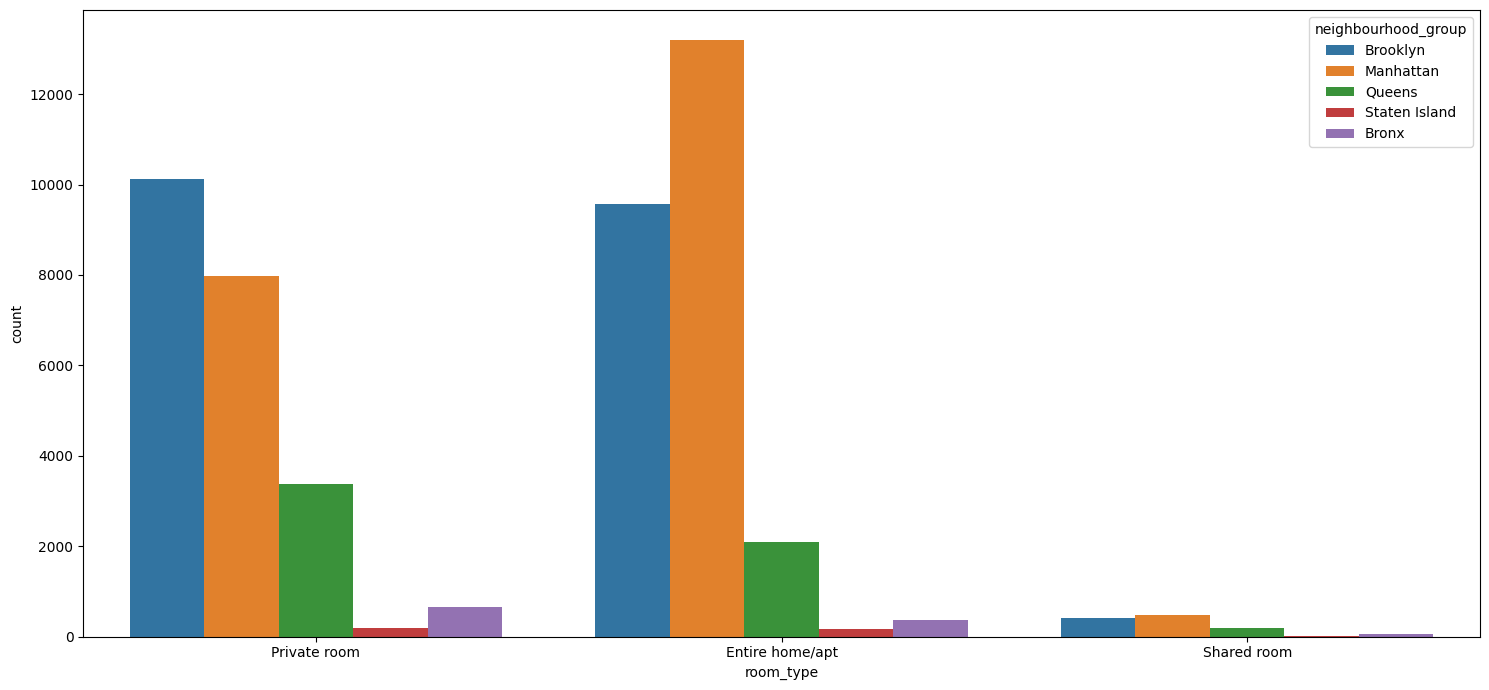

In [45]:
#Analisis categorico-categorico

fig, axis = plt.subplots(figsize = (15, 7))
sns.countplot(data = data_limpio, x = "room_type", hue = "neighbourhood_group")


plt.tight_layout()


plt.show()

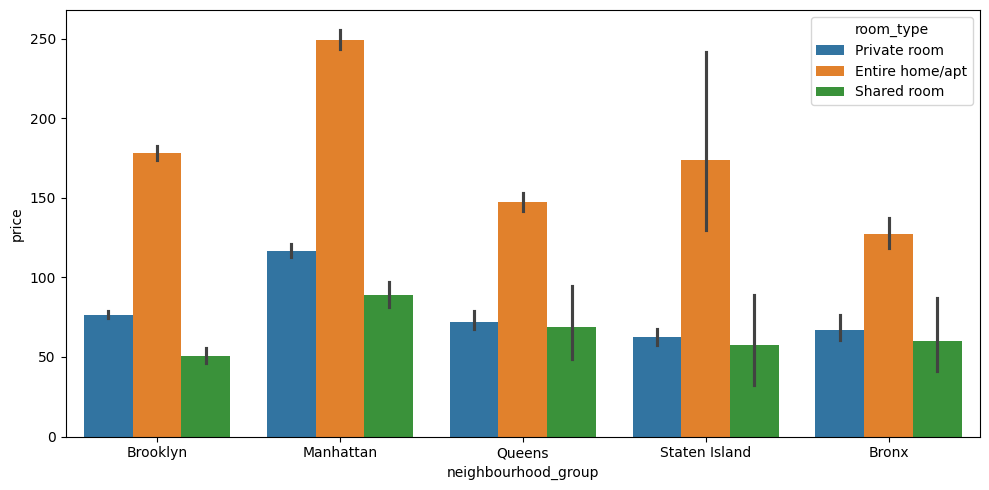

In [46]:
plt.figure(figsize = (10, 5))
sns.barplot(data_limpio, x = "neighbourhood_group", y = "price", hue = 'room_type')
plt.tight_layout()
plt.show()

In [47]:
neighbourhood = data_limpio["neighbourhood"].unique().tolist()
room_types = ['Private room', 'Entire home/apt', 'Shared room']
neighbourhood_groups = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
room_transformation_rules = {room_type: idx for idx, room_type in enumerate(room_types)}
neighbourhood_group_transformation_rules = {neighbourhood_group: idx for idx, neighbourhood_group in enumerate(neighbourhood_groups)}
neighbourhood_transformation_rules = {neighbourhood: idx for idx, neighbourhood in enumerate(neighbourhood)}
with open("room_transformation_rules.json", "w") as f:
    json.dump(room_transformation_rules, f)
with open("neighbourhood_group_transformation_rules.json", "w") as f:
    json.dump(neighbourhood_group_transformation_rules, f)
with open("neighbourhood_transformation_rules.json", "w") as f:
    json.dump(neighbourhood_transformation_rules, f)

In [48]:
data_limpio.columns


Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'availability_365'],
      dtype='object')

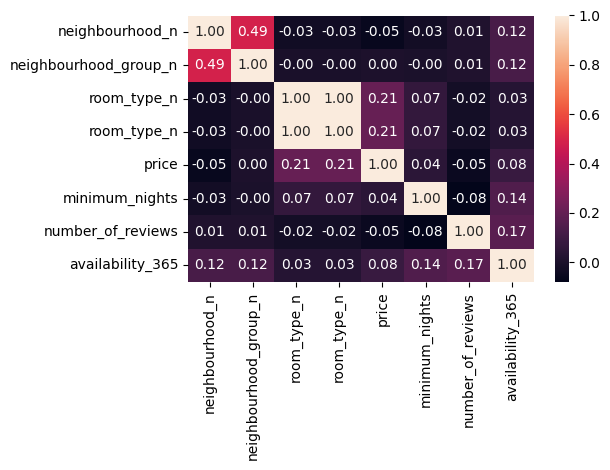

In [49]:
# Convertir las columnas categóricas a numéricas usando pd.factorize
data_limpio["neighbourhood_n"], _ = pd.factorize(data_limpio["neighbourhood"])
data_limpio["neighbourhood_group_n"], _ = pd.factorize(data_limpio["neighbourhood_group"])
data_limpio["room_type_n"], _ = pd.factorize(data_limpio["room_type"])

# Calcular la correlación y graficar
sns.heatmap(data_limpio[["neighbourhood_n", "neighbourhood_group_n", "room_type_n", "room_type_n", "price", "minimum_nights",	
                        "number_of_reviews", "availability_365"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

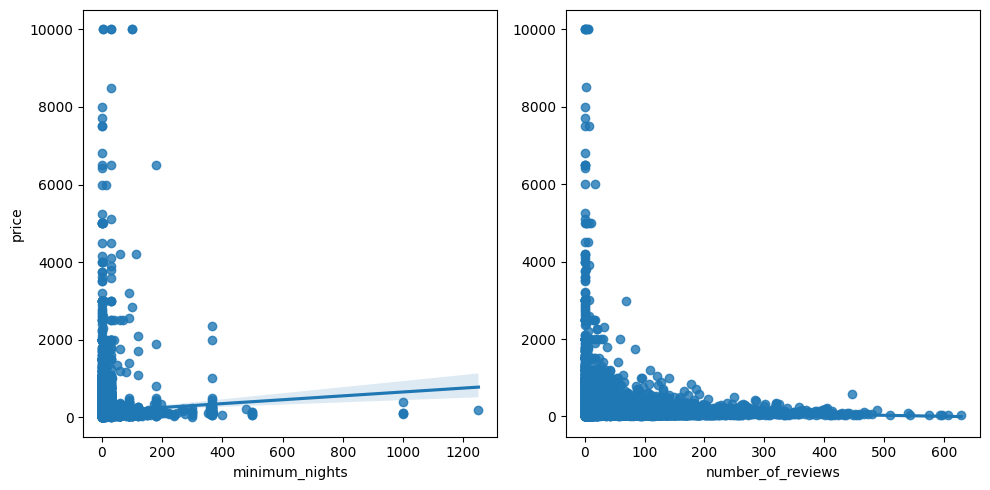

In [50]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data_limpio, x ="minimum_nights", y =  "price")
sns.regplot(ax = axis[1], data = data_limpio, x = "number_of_reviews", y = "price").set(ylabel = None)

plt.tight_layout()

plt.show()


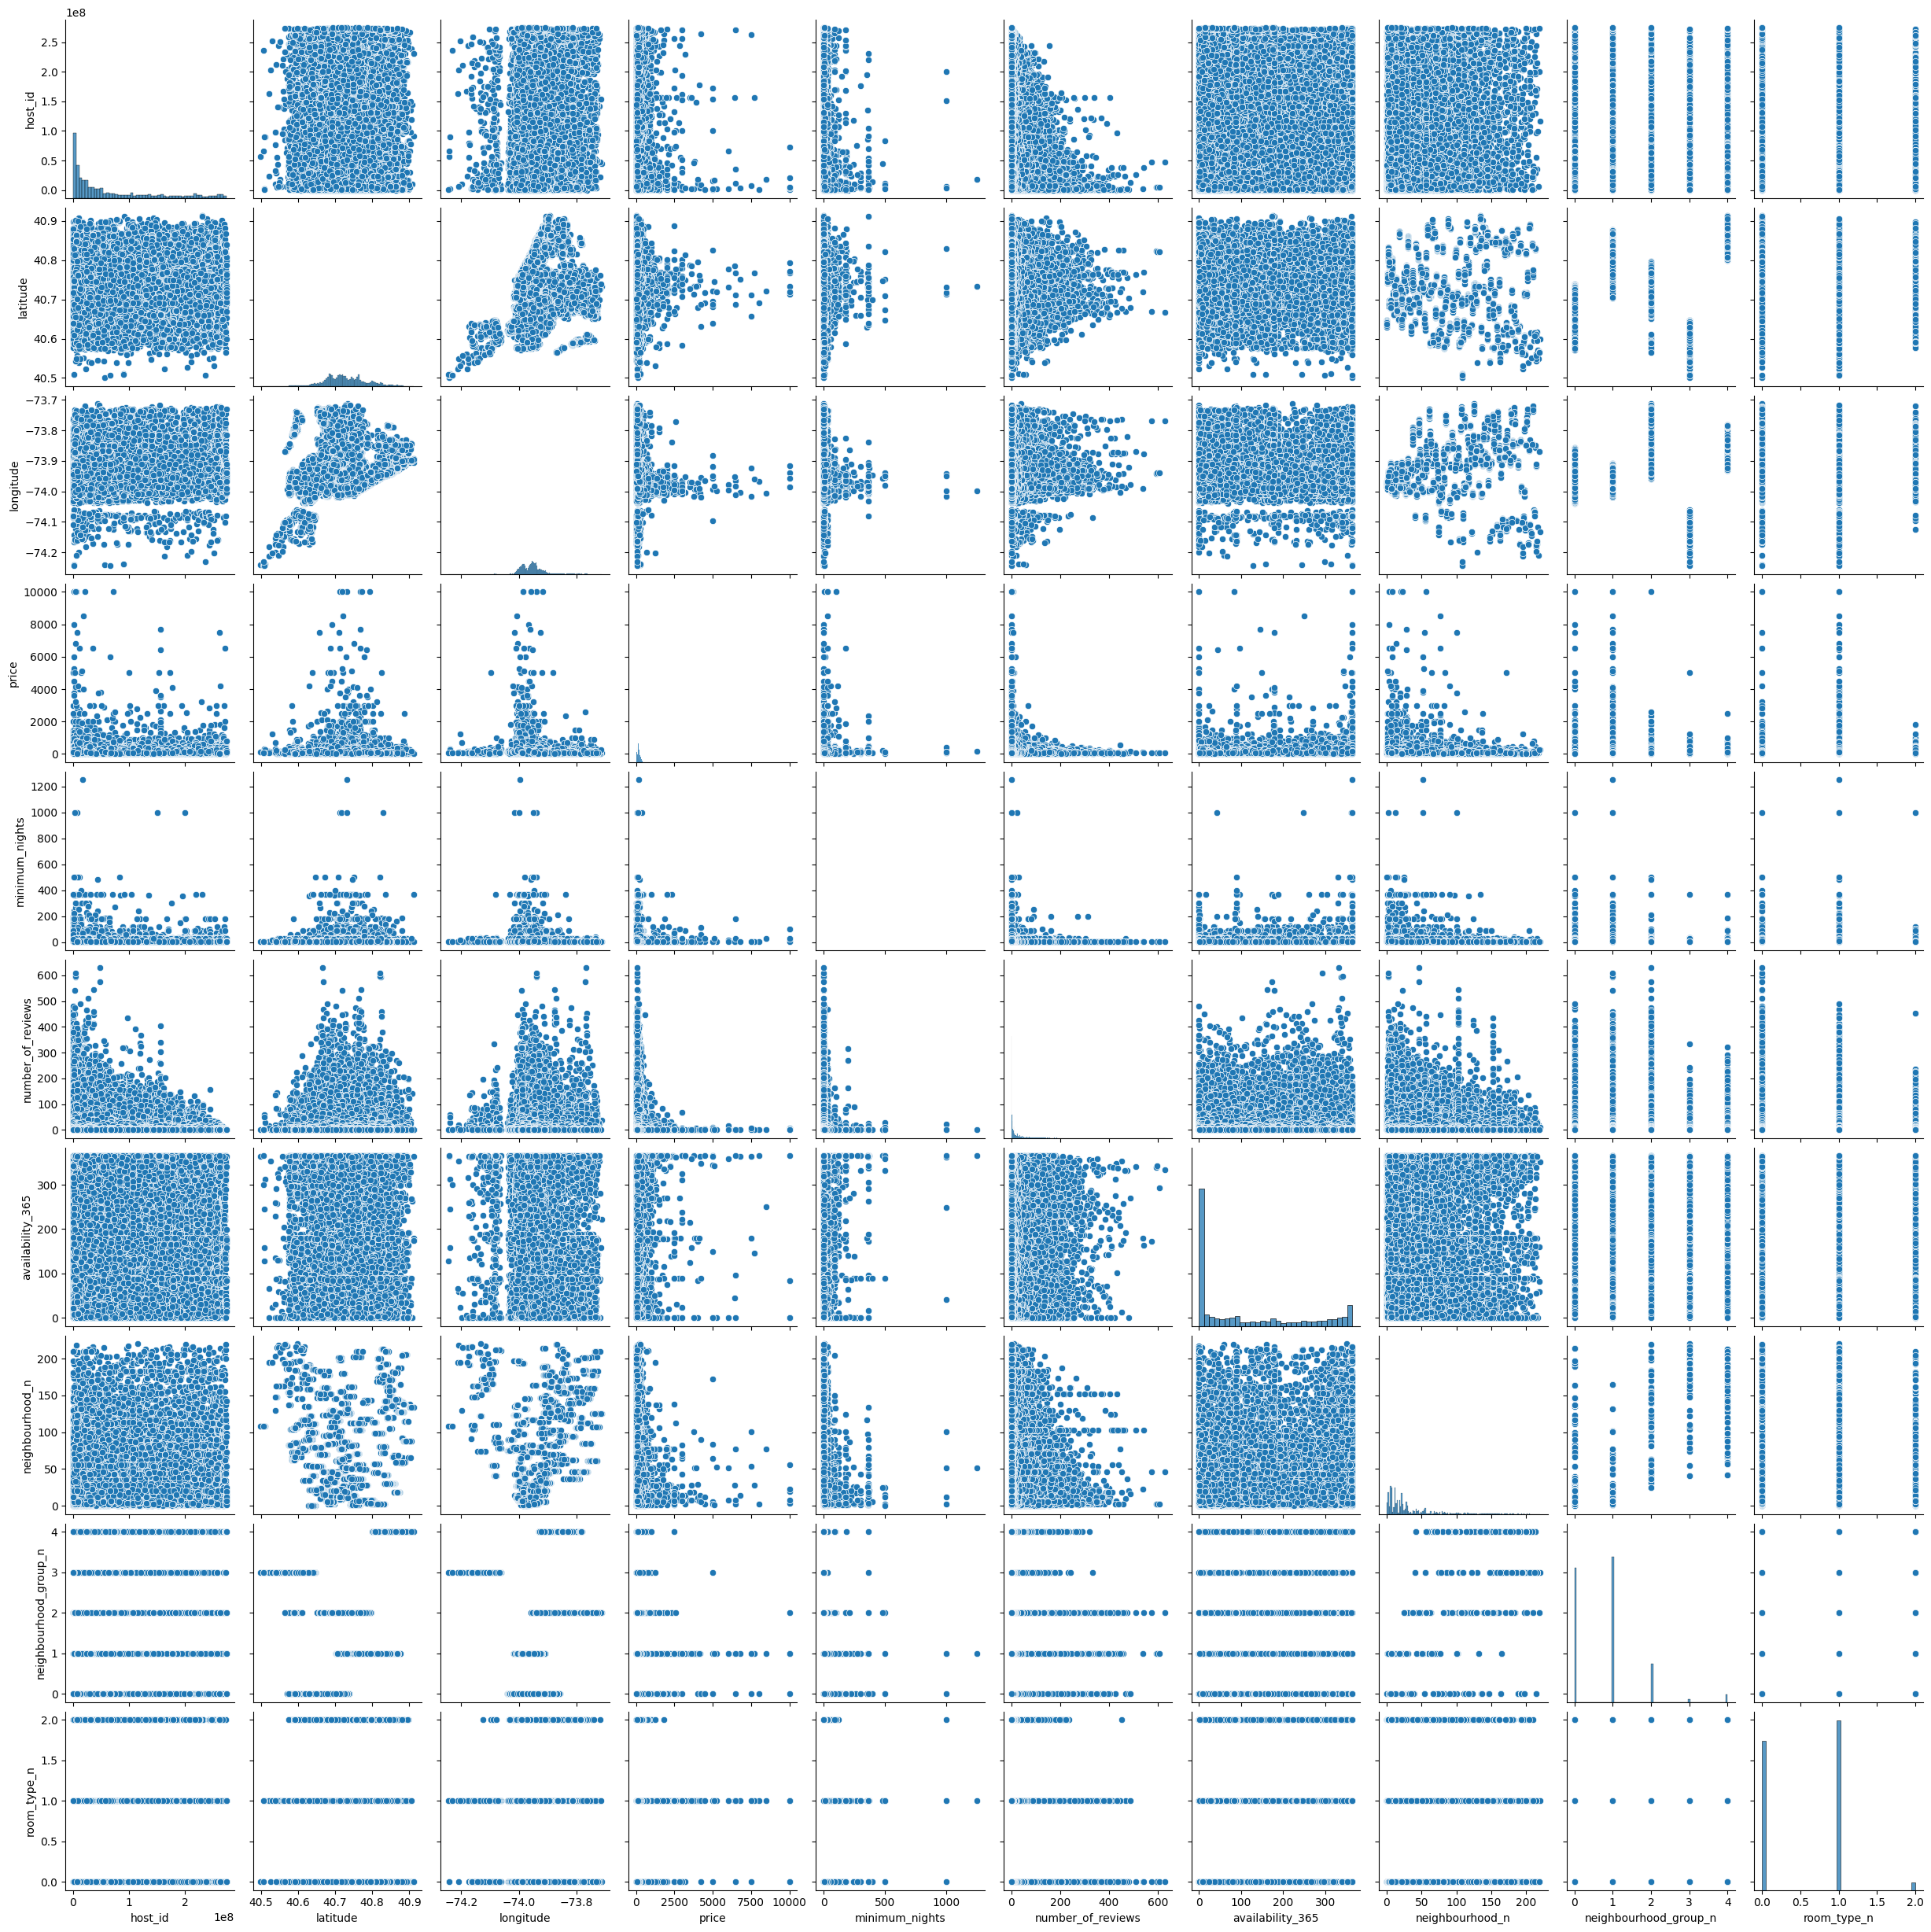

In [51]:
sns.pairplot(data = data_limpio)

In [52]:
data_limpio.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'availability_365', 'neighbourhood_n',
       'neighbourhood_group_n', 'room_type_n'],
      dtype='object')

In [53]:
data_limpio.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_n,neighbourhood_group_n,room_type_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,112.781327,29.888782,0.786911,0.567113
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,131.622289,34.676634,0.844386,0.541249
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,7.500000,0.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,45.000000,19.000000,1.000000,1.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,227.000000,37.000000,1.000000,1.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,365.000000,220.000000,4.000000,2.000000


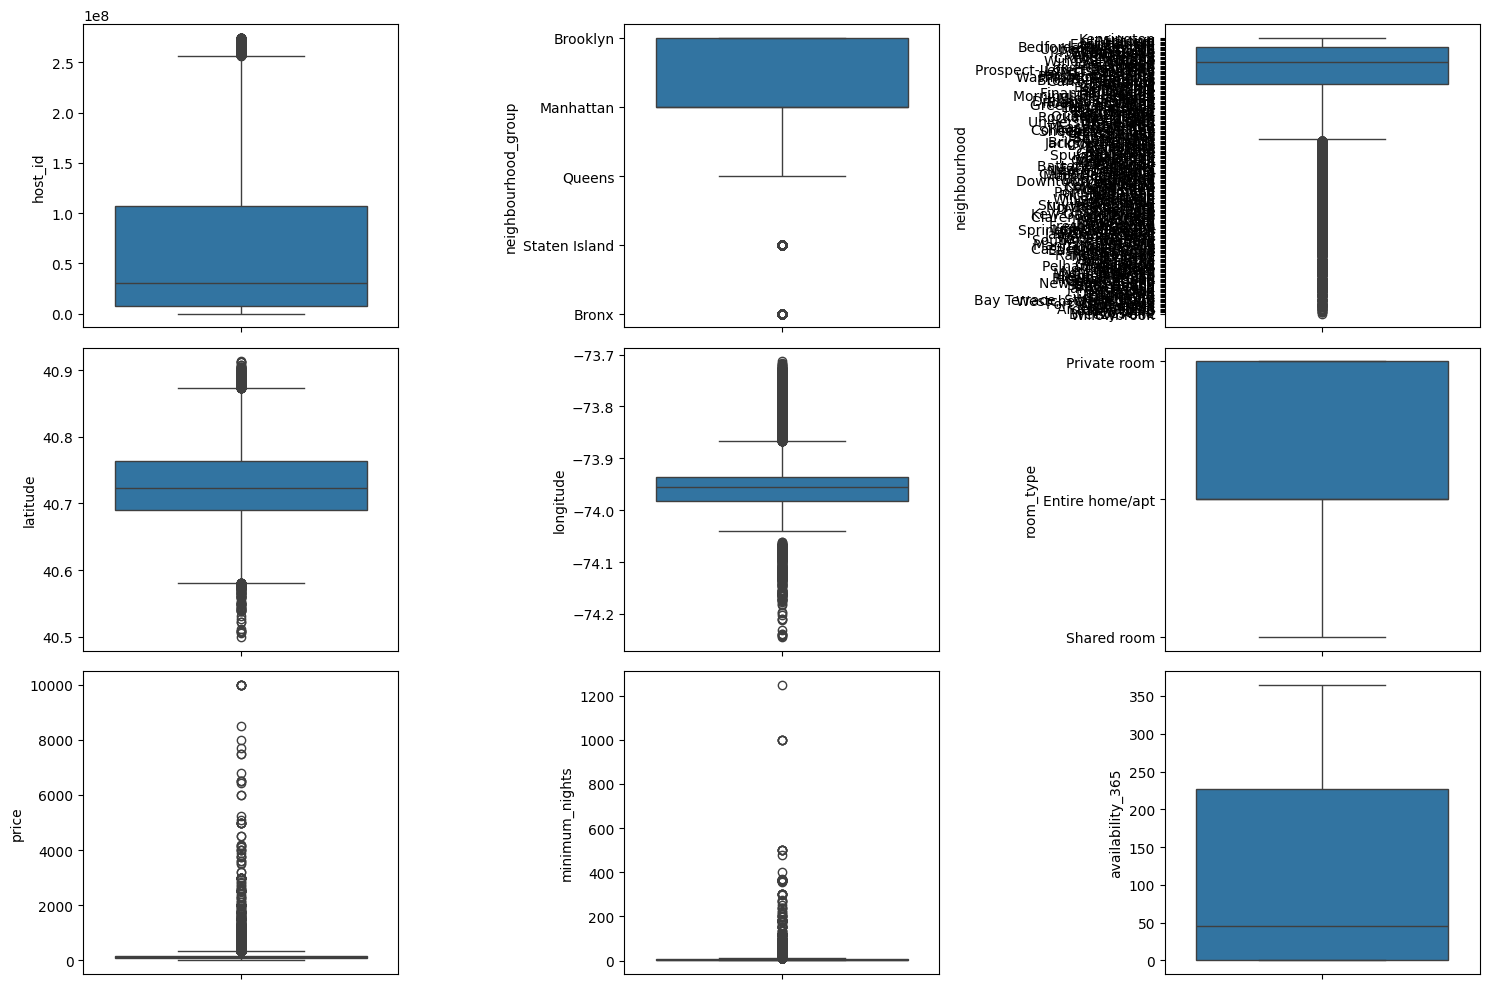

In [54]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data_limpio, y = 'host_id')
sns.boxplot(ax = axis[0, 1], data = data_limpio, y = 'neighbourhood_group')
sns.boxplot(ax = axis[0, 2], data = data_limpio, y = 'neighbourhood')
sns.boxplot(ax = axis[1, 0], data = data_limpio, y = 'latitude')
sns.boxplot(ax = axis[1, 1], data = data_limpio, y = 'longitude')
sns.boxplot(ax = axis[1, 2], data = data_limpio, y = 'room_type')
sns.boxplot(ax = axis[2, 0], data = data_limpio, y = 'price')
sns.boxplot(ax = axis[2, 1], data = data_limpio, y = 'minimum_nights')
sns.boxplot(ax = axis[2, 2], data = data_limpio, y = 'availability_365')

plt.tight_layout()

plt.show()

In [55]:
## Obtener las columnas numéricas del DataFrame
# columns = total_data.select_dtypes(include=['number']).columns.tolist()
# # Crear la figura y los ejes
# num_rows = (len(columns) + 2) // 3  # Calcular el número de filas necesarias
# #indicar número de columnas que deseas
# num_cols = 3
# fig, axis = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
# # Recorrer las columnas y asignarlas a los ejes
# for i, col in enumerate(columns):
#     row = i // num_cols  # Calcula la fila
#     col_index = i % num_cols  # Calcula el índice de la columna
#     sns.boxplot(ax=axis[row, col_index], data=total_data, y=col)
# # Eliminar ejes vacíos si los hay
# for j in range(len(columns), num_rows * num_cols):
#     fig.delaxes(axis.flatten()[j])  # Elimina los ejes vacíos
# # Ajustar el diseño
# plt.tight_layout()
# # Mostrar los gráficos
# plt.show()

In [56]:
import json

total_data_con_outliers = data_limpio.copy()
total_data_sin_outliers = data_limpio.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["neighbourhood_n", "neighbourhood_group_n", "room_type_n", "room_type_n", "price", "minimum_nights",	
                        "number_of_reviews", "availability_365" ]:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

# with open("outliers_replacement.json", "w") as f:
#   json.dump(outliers_dict, f)
outliers_dict

{'neighbourhood_n': [np.float64(-36.75), np.float64(81.25)],
 'neighbourhood_group_n': [np.float64(-1.5), np.float64(2.5)],
 'room_type_n': [np.float64(-1.5), np.float64(2.5)],
 'price': [np.float64(-90.0), np.float64(334.0)],
 'minimum_nights': [np.float64(-5.0), np.float64(11.0)],
 'number_of_reviews': [np.float64(-33.5), np.float64(58.5)],
 'availability_365': [np.float64(-340.5), np.float64(567.5)]}

In [57]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

host_id                  0
neighbourhood_group      0
neighbourhood            0
latitude                 0
longitude                0
room_type                0
price                    0
minimum_nights           0
number_of_reviews        0
availability_365         0
neighbourhood_n          0
neighbourhood_group_n    0
room_type_n              0
dtype: int64

In [58]:
data_limpio.isnull().sum().sort_values(ascending=False) / len(data_limpio)

host_id                  0.0
neighbourhood_group      0.0
neighbourhood            0.0
latitude                 0.0
longitude                0.0
room_type                0.0
price                    0.0
minimum_nights           0.0
number_of_reviews        0.0
availability_365         0.0
neighbourhood_n          0.0
neighbourhood_group_n    0.0
room_type_n              0.0
dtype: float64

In [59]:
#este paso no entiendo con que hacerlo
#total_data_con_outliers["FamMembers"] = total_data_con_outliers["SibSp"] + total_data_con_outliers["Parch"]
# total_data_sin_outliers["FamMembers"] = total_data_sin_outliers["SibSp"] + total_data_sin_outliers["Parch"]

# total_data_con_outliers.head()

In [60]:
from sklearn.model_selection import train_test_split

num_variables = ["neighbourhood_n", "neighbourhood_group_n", "room_type_n", "minimum_nights",	
                        "number_of_reviews", "availability_365"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("price", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("price", axis = 1)[num_variables]
y = total_data_con_outliers["price"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/workspaces/machine-learning-python-template/src/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/machine-learning-python-template/src/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/workspaces/machine-learning-python-template/src/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/machine-learning-python-template/src/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/workspaces/machine-learning-python-template/src/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/machine-learning-python-template/src/y_test.xlsx", index = False)
#/workspaces/machine-learning-python-template/src
X_train_con_outliers.head()

,neighbourhood_n,neighbourhood_group_n,room_type_n,minimum_nights,number_of_reviews,availability_365
32645,12,0,1,3,11,1
23615,30,1,0,2,2,0
31183,6,0,0,2,0,0
29260,6,0,1,3,87,267
7275,31,2,0,5,13,0


In [62]:
num_variables = data_limpio.select_dtypes(include=['number']).columns.tolist()
# # Si deseas filtrar específicamente algunas columnas, puedes hacerlo aquí.
# # Por ejemplo, si quieres excluir algunas columnas específicas:
# excluded_columns = ["price"]  # Coloca aquí cualquier columna que quieras excluir
# # Filtrar las columnas excluidas
# num_variables = [col for col in num_variables if col not in excluded_columns]

In [67]:
from sklearn.model_selection import train_test_split

num_variables = ["minimum_nights", "number_of_reviews", "neighbourhood_group_n", "neighbourhood_n", "room_type_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("price", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("price", axis = 1)[num_variables]
y = total_data_con_outliers["price"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/workspaces/machine-learning-python-template/src/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/machine-learning-python-template/src/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/workspaces/machine-learning-python-template/src/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/machine-learning-python-template/src/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/workspaces/machine-learning-python-template/src/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/machine-learning-python-template/src/y_test.xlsx", index = False)

X_train_con_outliers.head()



,minimum_nights,number_of_reviews,neighbourhood_group_n,neighbourhood_n,room_type_n
32645,3,11,0,12,1
23615,2,2,1,30,0
31183,2,0,0,6,0
29260,3,87,0,6,1
7275,5,13,2,31,0


In [68]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("/workspaces/machine-learning-python-template/src/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/workspaces/machine-learning-python-template/src/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/machine-learning-python-template/src/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("/workspaces/machine-learning-python-template/src/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/workspaces/machine-learning-python-template/src/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/machine-learning-python-template/src/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,minimum_nights,number_of_reviews,neighbourhood_group_n,neighbourhood_n,room_type_n
32645,-0.193025,-0.277198,-0.931915,-0.514100,0.798949
23615,-0.239596,-0.479451,0.256169,0.005517,-1.050482
31183,-0.239596,-0.524396,-0.931915,-0.687306,-1.050482
29260,-0.193025,1.430714,-0.931915,-0.687306,0.798949
7275,-0.099884,-0.232253,1.444253,0.034385,-1.050482


In [69]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("/workspaces/machine-learning-python-template/src/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/workspaces/machine-learning-python-template/src/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/machine-learning-python-template/src/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("/workspaces/machine-learning-python-template/src/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/workspaces/machine-learning-python-template/src/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/machine-learning-python-template/src/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,minimum_nights,number_of_reviews,neighbourhood_group_n,neighbourhood_n,room_type_n
32645,0.001601,0.017488,0.00,0.054545,0.5
23615,0.000801,0.003180,0.25,0.136364,0.0
31183,0.000801,0.000000,0.00,0.027273,0.0
29260,0.001601,0.138315,0.00,0.027273,0.5
7275,0.003203,0.020668,0.50,0.140909,0.0
